## Concept

* Unsupervised problem efficient for high dimensional data (random forest based and random feature pick)
* Algorithm:
    * Build random forest -> each isolation tree is built randomly
    * At each node, pick random feature and split at random threshold 
    * Try to isolate each data points
    * Anomalies are difficult to split futher and gets isolated at fewer depth 
    * Anomalies are easy to isolate ie it can take 4 steps to isolate, but > 10 on avg to isolate a non-anomalous points
    
* Hyperparameters:
    * Contamination : % of outliers in data. Higher input -> algo tries to find those many as outliers
    * Number of itrees
    * Sampling Size (m)
    
* Prediction:
    * Calculate anomalous score : $S(x, m) = 2 ^{-\frac{E(h)}{C(m)}} $
    * where 
        * E(h) - average search height in itrees
        * c(m) - averege path length of general point
        * m - number of samples
        * x - test data for which we are calculating score
    * Anomalous point - > E(h) << C(m) -> $2^0$ -> 1 
    * Regular point -> ~0.5. It is related to contamination (the algo will tweak this threshold to yield the required number of anomalies)

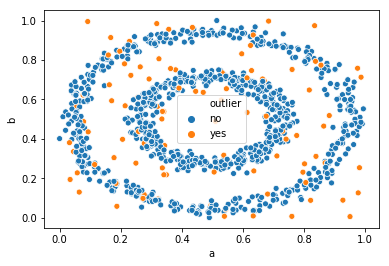

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'data\abn_data_1.csv')
sns.scatterplot(df['a'], df['b'], hue = df['outlier'])
plt.show()

In [13]:
df['outlier'].value_counts()

no     900
yes    100
Name: outlier, dtype: int64

In [15]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1, n_estimators=1000).fit(df.drop('outlier', axis = 1))
df['outlier_predict'] = model.predict(df.drop('outlier', axis = 1))

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [16]:
df['outlier_predict'] = df['outlier_predict'].map({1 : 0, -1 : 1})
df['outlier_predict'].value_counts()

0    900
1    100
Name: outlier_predict, dtype: int64

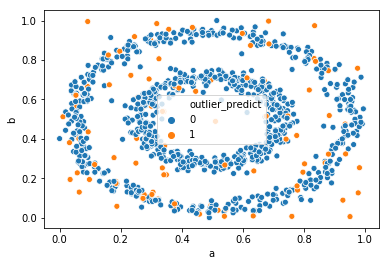

In [17]:
sns.scatterplot(df['a'], df['b'], hue = df['outlier_predict'])
plt.show()